# DBSCAN与层次聚类分析
DBSCAN:

    基于密度的聚类DBSCAN(Density-Based Special Clustering of Applications with Noise),密度可以理解为样本点的紧密程度，而紧密度的衡量则需要使用半径和最小样本量进行评估，如果在指定的半径领域内，实际样本量超过给定的最小样本量阈值，则认为是高密度的对象。

    特点和应用：
    1. DBSCAN方法可以方便发现样本集中的异常点，故通常可以使用该方法实现异常点的检测。
    2. 密度聚类算法可以发现任何形状的簇，且具有很强的抗噪声能力
    3. 密度聚类可以弥补kmeans的缺点（无法对非球形的簇进行聚类，非常容易受到极端值的影响）
    4. 对于密度聚类，要多调试eps和min_samples，因为该算法在不同的组合会有较大的差异
    
层次聚类:

    通过计算各个簇内样本点之间的相似度，进而构建一颗有层次的嵌套聚类树。
    
    特点和应用：
    1. 适合小样本的聚类，样本大时，运行效率低。因为要计算点与点，点与簇，簇与簇间的距离。
    2. 不适合非球形样本的聚类。
    3. 与Kmeans类似，可以认为设定聚类个数。
    
    种类（簇间的3种距离度量）：
    1. 最小距离法
    2. 最大距离法
    3. 平均距离法

## 密度聚类和kmeans的比较
如果用于聚类的数据集为类球形，则密度聚类和kmeans聚类的效果基本一致。

首先通过随机抽样的方式形成两个球形簇的样本集，然后对比密度聚类和kmeans

In [1]:
# 导入第三方模块
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster

import warnings
warnings.filterwarnings('ignore')

# %config ZMQInteractiveShell.ast_node_interactivity='all'   # nootbook使用

D:\software\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


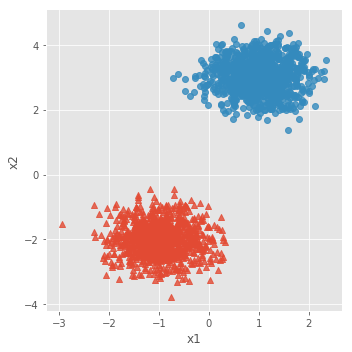

In [29]:
# 模拟数据集
X,y = make_blobs(n_samples = 2000,   # 待生成的样本的总数。
                 centers = [[-1,-2],[1,3]],   # 要生成的样本中心（类别）数，或者是确定的中心点
                 cluster_std = [0.5,0.5], 
                 random_state = 1234)
# 将模拟得到的数组转换为数据框，用于绘图
plot_data = pd.DataFrame(np.column_stack((X,y)), columns = ['x1','x2','y']) # np.column_stack行不变，列扩展
# 设置绘图风格
plt.style.use('ggplot')
# 绘制散点图（用不同的形状代表不同的簇）
sns.lmplot('x1',
           'x2', 
           data = plot_data,
           hue = 'y',
           markers = ['^','o'],
           fit_reg = False,
           legend = False)
# 显示图形
plt.show()

接下来用密度聚类和kmeans分别对以上数据集进行聚类

In [39]:
# 导入第三方模块
from sklearn import cluster
# 构建Kmeans聚类和密度聚类
kmeans = cluster.KMeans(n_clusters=2, random_state=1234)
kmeans.fit(X)
dbscan = cluster.DBSCAN(eps = 0.5, min_samples = 10)
dbscan.fit(X)
# 将Kmeans聚类和密度聚类的簇标签添加到数据框中
plot_data['kmeans_label'] = kmeans.labels_
plot_data['dbscan_label'] = dbscan.labels_
plot_data.head(10)

plot_data['dbscan_label'].unique()
plot_data['kmeans_label'].unique()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

,x1,x2,y,kmeans_label,dbscan_label
0,-0.680184,-2.481014,0.0,1,0
1,-1.583760,-1.979578,0.0,1,0
2,-0.695611,-2.835042,0.0,1,0
3,-1.280046,-1.917523,0.0,1,0
4,-1.092983,-2.117915,0.0,1,0
5,-1.685630,-1.873521,0.0,1,0
6,-1.202875,-1.807457,0.0,1,0
7,1.236425,3.317402,1.0,0,1
8,-0.404172,-2.063683,0.0,1,0
9,-0.770829,-1.716019,0.0,1,0


array([ 0,  1, -1], dtype=int64)

array([1, 0], dtype=int64)

密度聚类中的-1是异常点，密度聚类会返回异常点的结果

<Figure size 864x432 with 0 Axes>

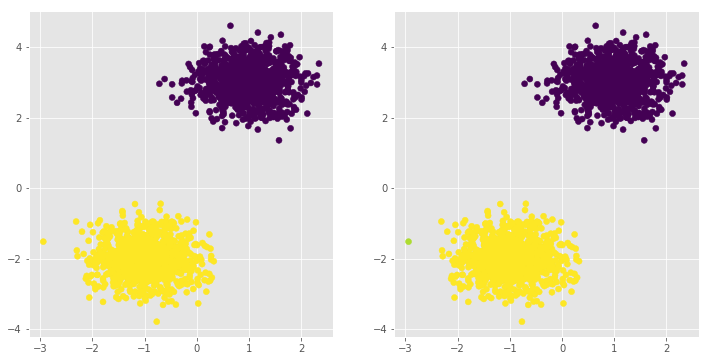

In [47]:
# 绘制聚类效果图
# 设置大图框的长和高
plt.figure(figsize = (12,6))

# 设置第一个子图的布局
ax1 = plt.subplot2grid(shape = (1,2), loc = (0,0))
# 绘制散点图
ax1.scatter(plot_data.x1, plot_data.x2, c = plot_data.kmeans_label)

# 设置第二个子图的布局
ax2 = plt.subplot2grid(shape = (1,2), loc = (0,1))
# 绘制散点图(为了使Kmeans聚类和密度聚类的效果图颜色一致，通过序列的map“方法”对颜色作重映射)
ax2.scatter(plot_data.x1, plot_data.x2, c=plot_data.dbscan_label.map({-1:7,0:8,1:0}))

# 显示图形
plt.show()

可以发现，右边的密度聚类不但能可以很好的区分各个簇，还能检测到异常点。
再来看看非球簇的样本点

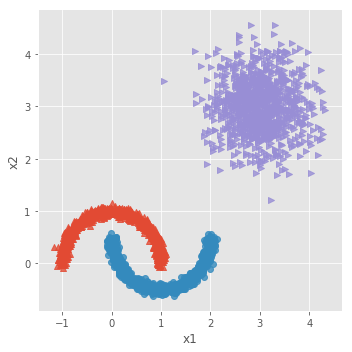

In [53]:
# 导入第三方模块
from sklearn.datasets.samples_generator import make_moons
# 构造非球形样本点
X1,y1 = make_moons(n_samples=2000, noise = 0.05, random_state = 1234)
# 构造球形样本点
X2,y2 = make_blobs(n_samples=1000, centers = [[3,3]], cluster_std = 0.5, random_state = 1234)

# 将y2的0值替换为2(为了避免与y1的值冲突，因为原始y1和y2中都有0这个值)
y2 = np.where(y2 == 0,2,0)
# 将模拟得到的数组转换为数据框，用于绘图
plot_data = pd.DataFrame(np.row_stack([np.column_stack((X1,y1)),np.column_stack((X2,y2))]), 
                         columns = ['x1','x2','y'])

# 绘制散点图（用不同的形状代表不同的簇）
sns.lmplot('x1',
           'x2',
           data = plot_data,
           hue = 'y',
           markers = ['^','o','>'],
           fit_reg = False,
           legend = False)
# 显示图形
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

<Figure size 864x432 with 0 Axes>

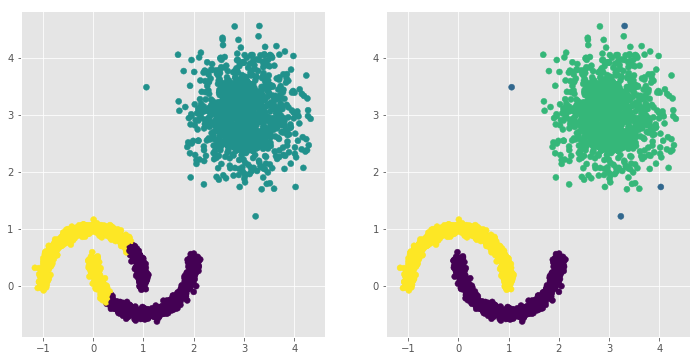

In [63]:
# 构建Kmeans聚类和密度聚类
kmeans = cluster.KMeans(n_clusters=3, random_state=1234)
kmeans.fit(plot_data[['x1','x2']])
dbscan = cluster.DBSCAN(eps = 0.3, min_samples = 5)
dbscan.fit(plot_data[['x1','x2']])
# 将Kmeans聚类和密度聚类的簇标签添加到数据框中
plot_data['kmeans_label'] = kmeans.labels_
plot_data['dbscan_label'] = dbscan.labels_

# 绘制聚类效果图
# 设置大图框的长和高
plt.figure(figsize = (12,6))
# 设置第一个子图的布局
ax1 = plt.subplot2grid(shape = (1,2), loc = (0,0))
# 绘制散点图
ax1.scatter(plot_data.x1, plot_data.x2, c = plot_data.kmeans_label)
# 设置第二个子图的布局
ax2 = plt.subplot2grid(shape = (1,2), loc = (0,1))
# 绘制散点图(为了使Kmeans聚类和密度聚类的效果图颜色一致，通过序列的map“方法”对颜色作重映射)
ax2.scatter(plot_data.x1, plot_data.x2, c=plot_data.dbscan_label.map({-1:1,0:0,1:3,2:2}))
# 显示图形
plt.show()

结论：当样本簇不满足球形簇时，kmeans效果非常不理想。右图的密度聚类还给出了四个异常点。

## 三种层次聚类的比较

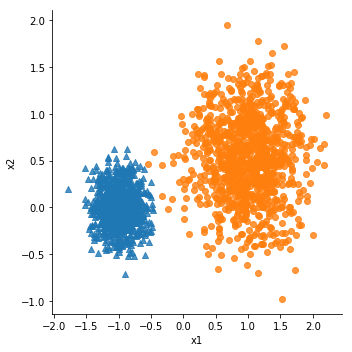

In [5]:
# 构造两个球形簇的数据样本点
X,y = make_blobs(n_samples = 2000, 
                 centers = [[-1,0],[1,0.5]], 
                 cluster_std = [0.2,0.45],
                 random_state = 1234)
# 将模拟得到的数组转换为数据框，用于绘图
plot_data = pd.DataFrame(np.column_stack((X,y)), columns = ['x1','x2','y'])
# 绘制散点图（用不同的形状代表不同的簇）
sns.lmplot('x1',
           'x2', 
           data = plot_data,
           hue = 'y',
           markers = ['^','o'],
           fit_reg = False,
           legend = False)
# 显示图形
plt.show()

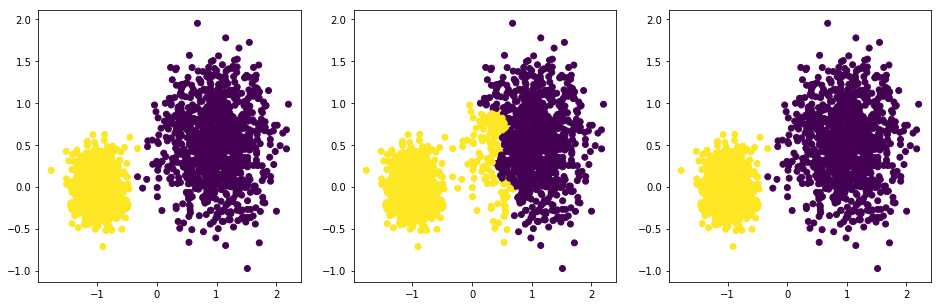

In [6]:
# 设置大图框的长和高
plt.figure(figsize = (16,5))
# 设置第一个子图的布局
ax1 = plt.subplot2grid(shape = (1,3), loc = (0,0))
# 层次聚类--最小距离法
agnes_min = cluster.AgglomerativeClustering(n_clusters = 2, linkage='ward')
agnes_min.fit(X)
# 绘制聚类效果图
ax1.scatter(X[:,0], X[:,1], c=agnes_min.labels_)

# 设置第二个子图的布局
ax2 = plt.subplot2grid(shape = (1,3), loc = (0,1))
# 层次聚类--最大距离法
agnes_max = cluster.AgglomerativeClustering(n_clusters = 2, linkage='complete')
agnes_max.fit(X)
ax2.scatter(X[:,0], X[:,1], c=agnes_max.labels_)

# 设置第三个子图的布局
ax2 = plt.subplot2grid(shape = (1,3), loc = (0,2))
# 层次聚类--平均距离法
agnes_avg = cluster.AgglomerativeClustering(n_clusters = 2, linkage='average')
agnes_avg.fit(X)
plt.scatter(X[:,0], X[:,1], c=agnes_avg.labels_)
plt.show()

最小距离（左）和平均距离（右）的聚类效果完全一样，并且只有三个样本点被错误聚类，而利用最大距离（中）却差很多，原因是由于原始数据中的模糊地带(两个簇交界的区域)的异常点夸大了簇之间的距离。

## 密度聚类，层次聚类，kmeans聚类的比较

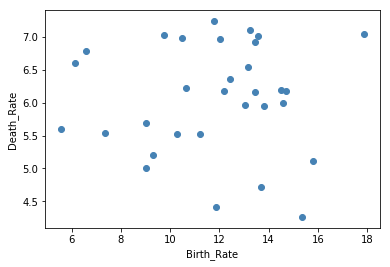

In [9]:
# 读取外部数据
Province = pd.read_excel(r'Province.xlsx')
Province.head()
# 绘制出生率与死亡率散点图
plt.scatter(Province.Birth_Rate, Province.Death_Rate, c = 'steelblue')
# 添加轴标签
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')
# 显示图形
plt.show()

不管是什么聚类，做标准化处理，可以避免量纲的不同造成的影响

In [10]:
# 读入第三方包
from sklearn import preprocessing
# 选取建模的变量
predictors = ['Birth_Rate','Death_Rate']
# 变量的标准化处理
X = preprocessing.scale(Province[predictors])
X = pd.DataFrame(X)

### 密度聚类

In [11]:
# 构建空列表，用于保存不同参数组合下的结果
res = []
# 迭代不同的eps值
for eps in np.arange(0.001,1,0.05):
    # 迭代不同的min_samples值
    for min_samples in range(2,10):
        dbscan = cluster.DBSCAN(eps = eps, min_samples = min_samples)
        # 模型拟合
        dbscan.fit(X)
        # 统计各参数组合下的聚类个数（-1表示异常点）
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        # 异常点的个数
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))  # 1代替-1,目的是求和
        # 统计每个簇的样本个数
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})
# 将迭代后的结果存储到数据框中        
df = pd.DataFrame(res)

# 根据条件筛选合理的参数组合
df.loc[df.n_clusters == 3, :]

,eps,min_samples,n_clusters,outliners,stats
40,0.251,2,3,23,[3 3 2]
57,0.351,3,3,19,[6 3 3]
88,0.551,2,3,7,[17 5 2]
96,0.601,2,3,7,[17 5 2]
104,0.651,2,3,5,[17 7 2]
112,0.701,2,3,5,[17 7 2]
129,0.801,3,3,4,[17 7 3]
136,0.851,2,3,2,[24 3 2]
144,0.901,2,3,1,[24 4 2]
152,0.951,2,3,1,[24 4 2]


对于密度聚类，要多调试eps和min_samples，因为该算法在不同的组合会有较大的差异。

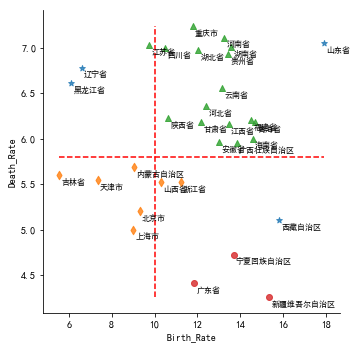

In [13]:
# 利用上述的参数组合值，重建密度聚类算法
dbscan = cluster.DBSCAN(eps = 0.801, min_samples = 3)
# 模型拟合
dbscan.fit(X)
Province['dbscan_label'] = dbscan.labels_
# 绘制聚类聚类的效果散点图
sns.lmplot(x = 'Birth_Rate',
           y = 'Death_Rate', 
           hue = 'dbscan_label',
           data = Province,
           markers = ['*','d','^','o'], 
           fit_reg = False,
           legend = False)
# 添加省份标签
for x,y,text in zip(Province.Birth_Rate,Province.Death_Rate, Province.Province):
    plt.text(x+0.1,y-0.1,text, size = 8)
# 添加参考线
plt.hlines(y = 5.8, xmin = Province.Birth_Rate.min(), xmax = Province.Birth_Rate.max(), 
           linestyles = '--', colors = 'red')
plt.vlines(x = 10, ymin = Province.Death_Rate.min(), ymax = Province.Death_Rate.max(), 
           linestyles = '--', colors = 'red')
plt.rcParams['font.sans-serif'] = ['SimHei']     # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False       # 用来正常显示负号
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')
# 显示图形
plt.show()

### 层次聚类

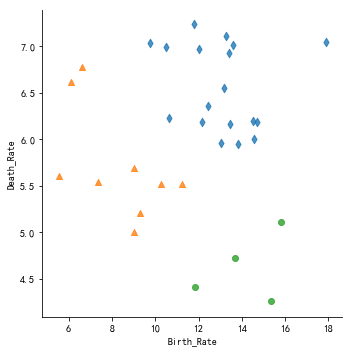

In [14]:
# 利用最小距离法构建层次聚类
agnes_min = cluster.AgglomerativeClustering(n_clusters = 3, linkage='ward')
# 模型拟合
agnes_min.fit(X)
Province['agnes_label'] = agnes_min.labels_
# 绘制层次聚类的效果散点图
sns.lmplot(x = 'Birth_Rate',
           y = 'Death_Rate',
           hue = 'agnes_label', 
           data = Province,
           markers = ['d','^','o'], 
           fit_reg = False,
           legend = False)
# 添加轴标签
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')
# 显示图形
plt.show()

由于层次聚类不会返回异常点的结果，故图中所有散点聚成了三个簇，与密度聚类相比，除了将异常点划分到对应的簇中，其他点被正确聚类。

### kmeans

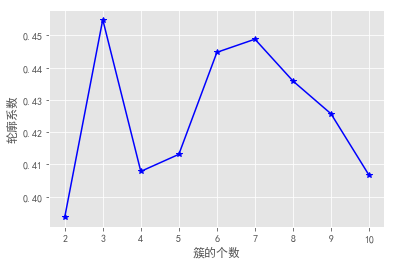

In [17]:
# 导入第三方模块
from sklearn import metrics
# 构造自定义函数，用于绘制不同k值和对应轮廓系数的折线图
def k_silhouette(X, clusters):
    K = range(2,clusters+1)
    # 构建空列表，用于存储个中簇数下的轮廓系数
    S = []
    for k in K:
        kmeans = cluster.KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        # 调用字模块metrics中的silhouette_score函数，计算轮廓系数
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['SimHei']     # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False       # 用来正常显示负号
    # 设置绘图风格
    plt.style.use('ggplot')    
    # 绘制K的个数与轮廓系数的关系
    plt.plot(K, S, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('轮廓系数')
    # 显示图形
    plt.show()
    
# 聚类个数的探索
k_silhouette(X, clusters = 10)

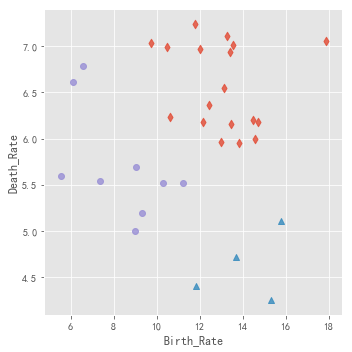

In [18]:
# 利用Kmeans聚类
kmeans = cluster.KMeans(n_clusters = 3)
# 模型拟合
kmeans.fit(X)
Province['kmeans_label'] = kmeans.labels_
# 绘制Kmeans聚类的效果散点图
sns.lmplot(x = 'Birth_Rate', 
           y = 'Death_Rate', 
           hue = 'kmeans_label',
           data = Province,
           markers = ['d','^','o'], 
           fit_reg = False, 
           legend = False)
# 添加轴标签
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')
plt.show()

kmeans和层次聚类完全一样。该数据集为球形分布的数据，因为密度聚类、层次聚类和kmeans聚类的效果几乎一致，不同的是，密度聚类可以非常方便发现数据中的异常点。